In [5]:
!pip install scikit-image



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.9 MB 3.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/12.9 MB 4.8 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.9 MB 5.5 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.9 MB 5.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/12.9 MB 5.6 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.9 MB 5.3 MB/s eta 0:00:02
   ----------------------- ---------------- 7.6/12.9 MB 5.2 MB/s eta 0:00:02
   -------------------------- ------------- 8.4/12.9 MB 5.1 MB/s eta 0:00:01
   ---------------------------- ----------- 9.2/12.9 MB 4.9 MB/s eta 0:00:01
   ------------------------------ --------- 10.0/12.9 MB 4.8 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.9 MB 4.7 MB/s eta 0:00:01
   

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import exposure, feature, color, io
import pandas as pd


In [16]:
ruta_dataset = r"C:\\Users\\Geraldine\\Downloads\\data\\dataset"



In [13]:
datos_imagenes = []
for estado in os.listdir(ruta_dataset):
    carpeta_estado = os.path.join(ruta_dataset, estado)
    if not os.path.isdir(carpeta_estado):
        continue  # si no es carpeta, saltar

    for nombre_archivo in os.listdir(carpeta_estado):
        if nombre_archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
            ruta_imagen = os.path.join(carpeta_estado, nombre_archivo)

            # Leer imagen
            img = io.imread(ruta_imagen)
            if img.shape[-1] == 4:
             img = img[:, :, :3]

# Convertir a escala de grises
            img_gray = color.rgb2gray(img)

            # Propiedades
            alto, ancho = img_gray.shape
            brillo = np.mean(img_gray)
            contraste = np.std(img_gray)

            # Bordes (Canny)
            edges = feature.canny(img_gray, sigma=1)
            densidad_bordes = np.sum(edges) / (alto * ancho)

            # Guardar datos
            datos_imagenes.append({
                "estado": estado,
                "nombre": nombre_archivo,
                "ancho": ancho,
                "alto": alto,
                "brillo": brillo,
                "contraste": contraste,
                "densidad_bordes": densidad_bordes
            })

# Convertir a DataFrame
df = pd.DataFrame(datos_imagenes)
df

,estado,nombre,ancho,alto,brillo,contraste,densidad_bordes
0,dañadas,Captura de pantalla 2025-10-08 171143.png,261,332,0.327412,0.190376,0.150614
1,dañadas,Captura de pantalla 2025-10-08 171220.png,263,322,0.294652,0.212487,0.133340
2,dañadas,Captura de pantalla 2025-10-08 171304.png,299,342,0.314625,0.164218,0.122885
3,dañadas,Captura de pantalla 2025-10-08 171640.png,281,295,0.256059,0.173575,0.156451
4,dañadas,Captura de pantalla 2025-10-08 171720.png,425,466,0.259912,0.166915,0.120586
...,...,...,...,...,...,...,...
1104,normal,Screenshot 2025-10-10 043523.png,564,799,0.522596,0.188695,0.072873
1105,normal,Screenshot 2025-10-10 043528.png,735,993,0.691052,0.139218,0.063051
1106,normal,Screenshot 2025-10-10 043545.png,580,794,0.561906,0.187704,0.106252
1107,normal,Screenshot 2025-10-10 043554.png,574,785,0.500776,0.183612,0.096593


Text(0, 0.5, 'Frecuencia')

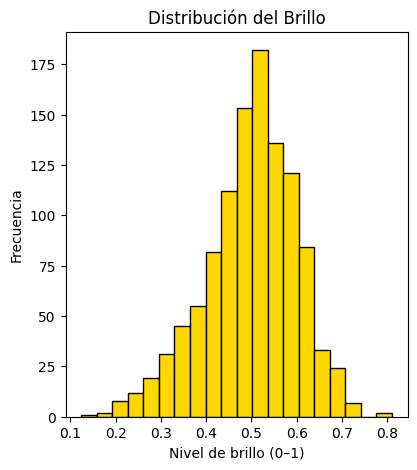

In [21]:
plt.figure(figsize=(15,5))

# Histograma de brillo
plt.subplot(1, 3, 1)
plt.hist(df["brillo"], bins=20, color='gold', edgecolor='black')
plt.title("Distribución del Brillo")
plt.xlabel("Nivel de brillo (0–1)")
plt.ylabel("Frecuencia")

In [19]:
import os
import numpy as np
import pandas as pd
from skimage import color, io
from collections import Counter


datos_color = []

for estado in os.listdir(ruta_dataset):
    carpeta_estado = os.path.join(ruta_dataset, estado)
    if not os.path.isdir(carpeta_estado):
        continue

    for nombre_archivo in os.listdir(carpeta_estado):
        if nombre_archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
            ruta_imagen = os.path.join(carpeta_estado, nombre_archivo)
            img = io.imread(ruta_imagen)

            # 🔹 Eliminar canal alfa si existe
            if img.ndim == 3 and img.shape[-1] == 4:
                img = img[:, :, :3]

            # 🔹 Calcular promedio de color (en escala 0-1)
            r_mean = np.mean(img[:, :, 0]) / 255
            g_mean = np.mean(img[:, :, 1]) / 255
            b_mean = np.mean(img[:, :, 2]) / 255

            # 🔹 Convertir a HSV y obtener saturación promedio
            img_hsv = color.rgb2hsv(img)
            s_mean = np.mean(img_hsv[:, :, 1])

            # 🔹 Color dominante (aproximado)
            # Reducimos resolución para hacerlo rápido
            small = img[::20, ::20, :]  # tomar cada 20 píxeles
            pixels = small.reshape(-1, 3)
            mean_color = np.mean(pixels, axis=0)
            dominant = np.argmax(mean_color)  # 0=R, 1=G, 2=B

            datos_color.append({
                "estado": estado,
                "nombre": nombre_archivo,
                "R_promedio": r_mean,
                "G_promedio": g_mean,
                "B_promedio": b_mean,
                "saturacion": s_mean,
                "canal_dominante": ["Rojo", "Verde", "Azul"][dominant]
            })

# Convertir a DataFrame
df_color = pd.DataFrame(datos_color)
df_color


,estado,nombre,R_promedio,G_promedio,B_promedio,saturacion,canal_dominante
0,dañadas,Captura de pantalla 2025-10-08 171143.png,0.325859,0.327133,0.334758,0.455265,Azul
1,dañadas,Captura de pantalla 2025-10-08 171220.png,0.297178,0.293117,0.302446,0.341067,Azul
2,dañadas,Captura de pantalla 2025-10-08 171304.png,0.314880,0.311343,0.346440,0.381512,Azul
3,dañadas,Captura de pantalla 2025-10-08 171640.png,0.256166,0.252211,0.293924,0.485665,Azul
4,dañadas,Captura de pantalla 2025-10-08 171720.png,0.240395,0.257478,0.341583,0.522260,Azul
...,...,...,...,...,...,...,...
1104,normal,Screenshot 2025-10-10 043523.png,0.531684,0.523987,0.482011,0.210173,Rojo
1105,normal,Screenshot 2025-10-10 043528.png,0.671849,0.700902,0.649921,0.201220,Verde
1106,normal,Screenshot 2025-10-10 043545.png,0.626758,0.553166,0.457495,0.286220,Rojo
1107,normal,Screenshot 2025-10-10 043554.png,0.530469,0.498320,0.437629,0.223432,Rojo
